In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [68]:
data = pd.read_csv(r'C:\Users\Stephen\Desktop\Liquifaction\liqdata.csv')
data.dropna(inplace = True) 

In [69]:
data

,Magnitude,amax,Liq,Avg Depth,Depth to GWT,sigvc,sig'vc,Tip,Sleeve,Friction,...,Repr. FC,C N,qc1N,Iqc1N,"qc1N,cs",rd,CSR,K sigma,MSF,"CSR for M=7.5,sig=1"
0,7.60,0.162,1.0,4.4,1.1,82,49,39.8,0.39,1.00,...,3,1.54,61.2,0.0,61.2,0.97,0.170,1.06,1.00,0.161
1,7.60,0.162,1.0,3.1,1.4,56,40,30.0,0.30,1.02,...,5,1.70,51.0,0.1,51.1,0.98,0.147,1.07,1.00,0.138
2,7.60,0.162,0.0,5.5,1.7,98,61,124.0,1.60,1.30,...,5,1.23,152.0,0.2,152.1,0.96,0.163,1.08,0.98,0.154
6,5.90,0.320,1.0,3.9,2.7,69,57,21.4,0.44,2.12,...,85,1.35,28.8,61.3,90.1,0.94,0.235,1.06,1.14,0.195
7,5.90,0.090,0.0,3.2,1.5,58,41,32.2,0.25,0.80,...,20,1.62,52.1,30.5,82.7,0.95,0.078,1.08,1.12,0.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,7.51,0.400,0.0,3.2,2.5,57,50,78.0,0.88,1.13,...,12,1.38,107.6,14.0,121.6,0.98,0.290,1.09,1.00,0.266
156,7.51,0.300,1.0,4.9,0.8,92,51,52.3,0.24,0.47,...,11,1.44,75.5,9.6,85.1,0.96,0.338,1.07,1.00,0.317
157,7.62,0.380,1.0,2.5,1.0,46,31,20.0,0.20,1.02,...,38,1.70,34.0,48.8,82.8,0.99,0.360,1.10,0.99,0.330
160,7.62,0.600,1.0,3.0,1.1,55,36,30.0,0.30,1.02,...,35,1.66,49.9,50.2,100.1,0.98,0.578,1.10,0.99,0.531


In [70]:
data.describe()

,Magnitude,amax,Liq,Avg Depth,Depth to GWT,sigvc,sig'vc,Tip,Sleeve,Friction,...,Repr. FC,C N,qc1N,Iqc1N,"qc1N,cs",rd,CSR,K sigma,MSF,"CSR for M=7.5,sig=1"
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,6.935000,0.303649,0.690299,4.549254,2.324627,82.985075,61.208955,59.170896,0.406791,0.767090,...,16.253731,1.358358,75.837313,17.577612,93.420896,0.948806,0.257970,1.055896,1.063657,0.230806
std,0.372897,0.116104,0.462076,2.015308,1.463616,37.456338,28.168151,40.697688,0.420397,0.586528,...,18.017822,0.262436,45.871430,20.749743,42.148458,0.033852,0.105619,0.039034,0.069461,0.096164
min,5.900000,0.090000,0.000000,1.400000,0.400000,24.000000,19.000000,9.400000,0.010000,0.030000,...,1.000000,0.850000,15.900000,0.000000,16.100000,0.840000,0.071000,0.950000,0.980000,0.062000
25%,6.892500,0.245000,0.000000,2.900000,1.300000,53.000000,39.250000,33.250000,0.192500,0.360000,...,4.000000,1.122500,46.125000,0.000000,66.300000,0.930000,0.187250,1.020000,1.020000,0.171000
50%,6.930000,0.280000,1.000000,4.100000,1.850000,74.000000,54.000000,51.150000,0.275000,0.585000,...,10.000000,1.370000,63.250000,7.250000,85.250000,0.960000,0.245500,1.060000,1.040000,0.221000
75%,6.930000,0.370000,1.000000,5.875000,3.000000,107.250000,79.000000,77.225000,0.492500,1.020000,...,20.000000,1.597500,94.200000,32.425000,114.400000,0.977500,0.290750,1.090000,1.077500,0.265750
max,7.700000,0.840000,1.000000,11.000000,7.200000,204.000000,147.000000,300.000000,2.940000,2.880000,...,85.000000,1.700000,311.800000,63.100000,311.900000,0.990000,0.619000,1.100000,1.300000,0.589000


In [71]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data)
column_names = list(data.columns.values)[:-1]

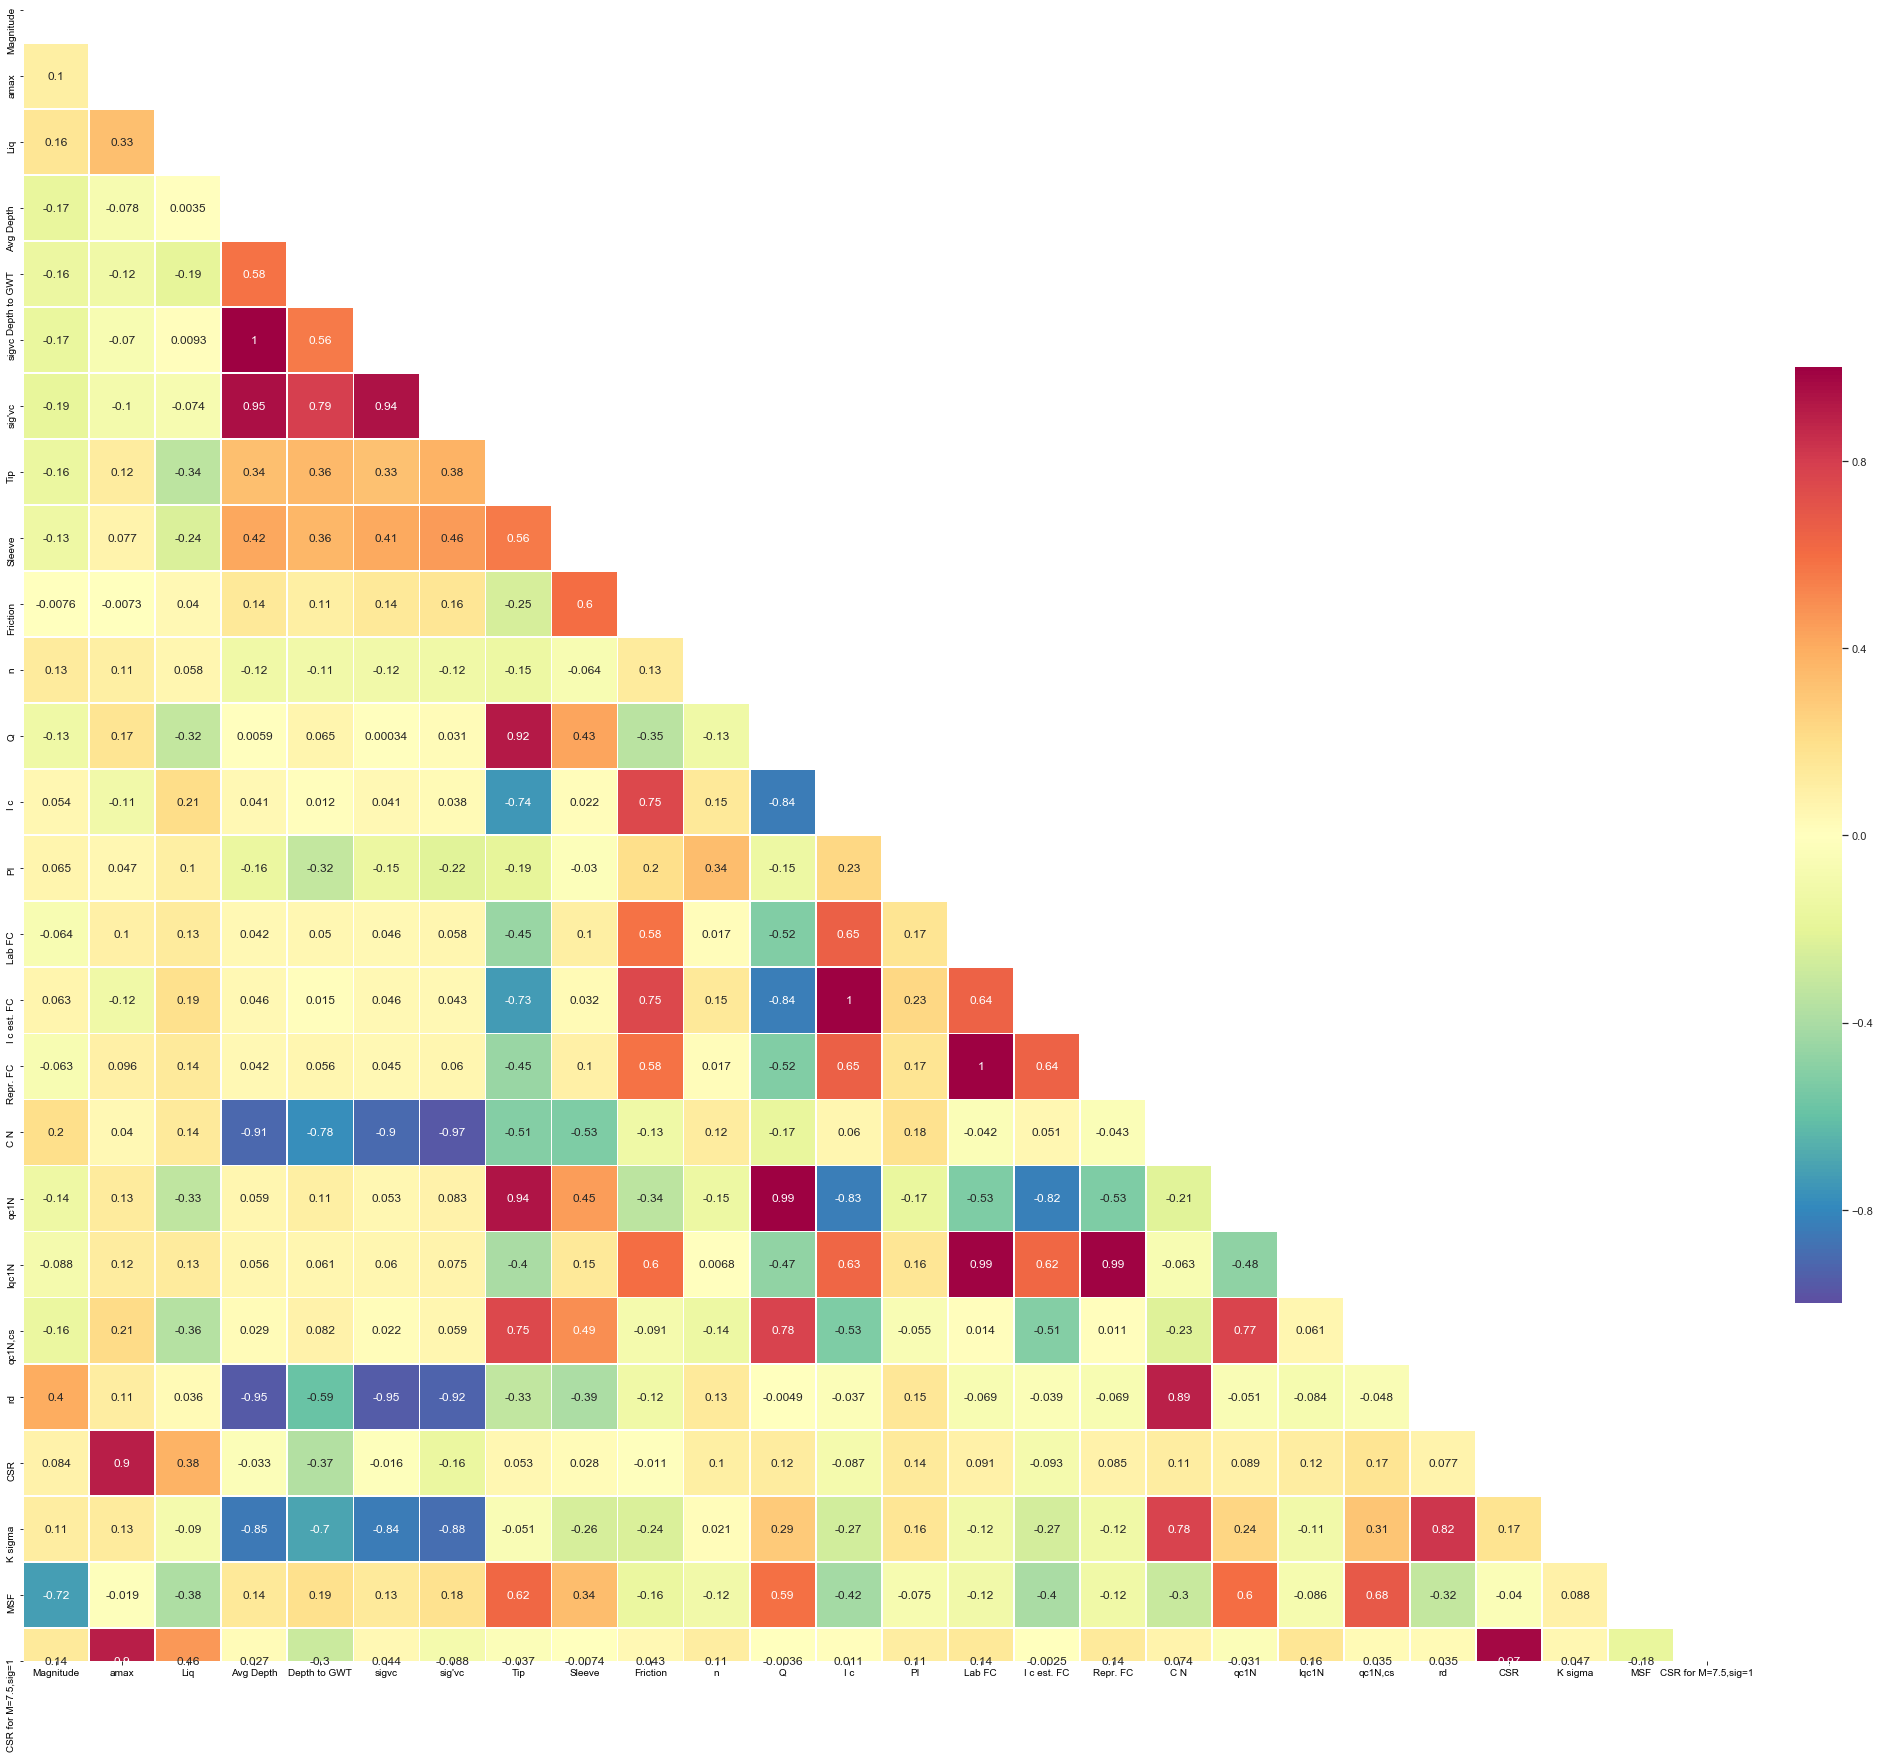

In [72]:
corr = data.corr('spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig,axs = plt.subplots(figsize = (26,26), constrained_layout = True)
sns.set(style = "white")
sns.heatmap(corr, cmap = 'Spectral_r',square = True, mask = mask,
            vmin = -1.0, vmax = 1.0,cbar_kws = {"shrink": 0.5},
            linewidths = 0.8, linecolor= 'white', annot = True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(12,input_dim=25, activation = 'relu'))
classifier.add(Dense(20,activation='relu'))
classifier.add(Dense(20,activation='relu'))
classifier.add(Dense(20,activation='relu'))
classifier.add(Dense(1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])
scaled_data.dtype.names

In [ ]:
history = classifier.fit(np.delete(scaled_data, 2, axis=1),
               scaled_data[:,2],
                batch_size = 5,
                epochs =200,
              validation_split = 0.2,
              verbose = 0)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
rounded_predict=np.round_(classifier.predict(np.delete(scaled_data, 2, axis=1)),decimals=0)
np.concatenate((rounded_predict,np.delete(scaled_data, 2, axis=1)), axis=1)